In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df1=pd.read_csv('domestic_visitors_2016.csv')

In [3]:
df2=pd.read_csv('domestic_visitors_2017.csv')

In [4]:
df3=pd.read_csv('domestic_visitors_2018.csv')

In [5]:
df4=pd.read_csv('domestic_visitors_2019.csv')

In [6]:
df4.head()

,district,date,month,year,visitors
0,Adilabad,01-01-2019,January,2019,25071
1,Adilabad,01-02-2019,February,2019,406177
2,Adilabad,01-03-2019,March,2019,14347
3,Adilabad,01-04-2019,April,2019,9972
4,Adilabad,01-05-2019,May,2019,6997


In [7]:
df=pd.concat([df1,df2,df3,df4])

In [8]:
df.to_csv('domestic_tourist.csv')

df.tail()

,district,date,month,year,visitors
391,Yadadri Bhongir,01-08-2019,August,2019,389010
392,Yadadri Bhongir,01-09-2019,September,2019,366862
393,Yadadri Bhongir,01-10-2019,October,2019,381860
394,Yadadri Bhongir,01-11-2019,November,2019,365990
395,Yadadri Bhongir,01-12-2019,December,2019,477635


In [9]:
len(df)

1512

In [10]:
df.isna().sum()

district     0
date         0
month        0
year         0
visitors    30
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1512 entries, 0 to 395
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   district  1512 non-null   object
 1   date      1512 non-null   object
 2   month     1512 non-null   object
 3   year      1512 non-null   int64 
 4   visitors  1482 non-null   object
dtypes: int64(1), object(4)
memory usage: 70.9+ KB


In [12]:
import math
from numpy import nan

def isblank_na(x):
    
    if x!=' ':
        if  isinstance(x,str):
            return float(x)

df['visitors'].dropna(axis=0,inplace=True)        
df['visitors_without_blank']=df['visitors'].apply(lambda x:isblank_na(x))

In [13]:

df['visitors_without_blank'].dropna(axis=0).isna().sum()
#df[df['visitors'].isna()==True]

0

In [14]:
df[df['visitors']==0]

,district,date,month,year,visitors,visitors_without_blank


C:\Users\lenovo\AppData\Local\Temp\ipykernel_6324\2483589881.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['visitors_without_blank'].dropna(axis=0))
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='visitors_without_blank', ylabel='Density'>

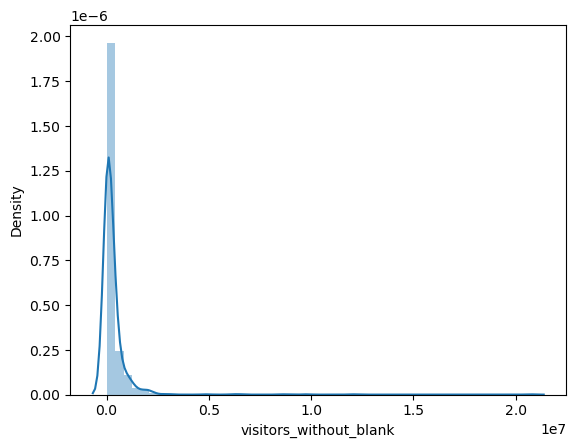

In [15]:
sns.distplot(df['visitors_without_blank'].dropna(axis=0))

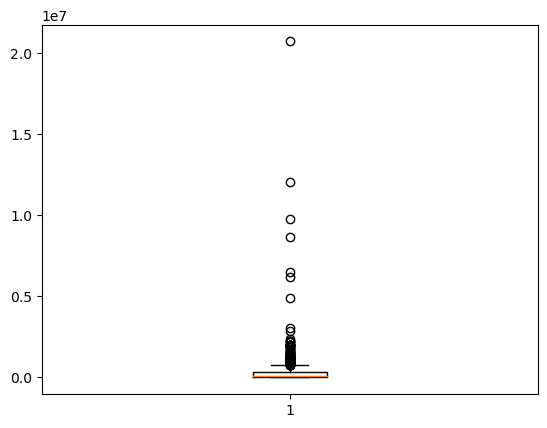

In [16]:
plt.boxplot(df['visitors_without_blank'].dropna(axis=0))
#df[df['visitors_without_blank']<=(df['visitors_without_blank'].describe()['75%']+1.5*IQR)]['visitors_without_blank']
#plt.boxplot(df[df['visitors_without_blank']<=(df['visitors_without_blank'].describe()['75%']+1.5*IQR)]['visitors_without_blank'])
#
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x261b978e440>,
 'caps': [<matplotlib.lines.Line2D at 0x261b978e9b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x261b978e1a0>],
 'medians': [<matplotlib.lines.Line2D at 0x261b978eef0>],
 'fliers': [<matplotlib.lines.Line2D at 0x261b978f190>],
 'means': []}

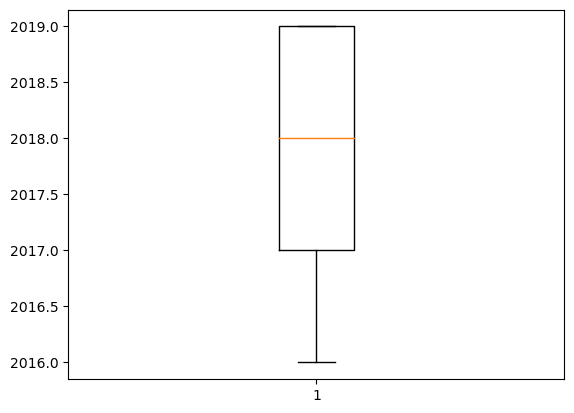

In [17]:
plt.boxplot(df['year'])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1512 entries, 0 to 395
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   district                1512 non-null   object 
 1   date                    1512 non-null   object 
 2   month                   1512 non-null   object 
 3   year                    1512 non-null   int64  
 4   visitors                1482 non-null   object 
 5   visitors_without_blank  1167 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 82.7+ KB


In [19]:
df['visitors_without_blank'].describe()

count    1.167000e+03
mean     3.053485e+05
std      9.215106e+05
min      0.000000e+00
25%      1.320500e+04
50%      1.192550e+05
75%      3.153185e+05
max      2.070378e+07
Name: visitors_without_blank, dtype: float64

In [20]:
df['visitors_without_blank'].mean()

305348.45672664954

In [21]:
df['visitors_without_blank'].median()

119255.0

In [22]:
IQR=df['visitors_without_blank'].describe()['75%']-df['visitors_without_blank'].describe()['25%']
IQR

302113.5

In [23]:
df['visitors_without_blank'].describe()['25%']-1.5*IQR

-439965.25

In [24]:
df['visitors_without_blank'].describe()['75%']+1.5*IQR

768488.75

In [25]:
df[df['visitors_without_blank']>(df['visitors_without_blank'].describe()['75%']+1.5*IQR)]['visitors_without_blank']

0       792136.0
1       937820.0
24     1122510.0
25      778748.0
26     1017794.0
         ...    
280    1018131.0
281    1128849.0
286    1259371.0
287    1472801.0
317    1037000.0
Name: visitors_without_blank, Length: 110, dtype: float64

C:\Users\lenovo\AppData\Local\Temp\ipykernel_6324\3776093937.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['visitors_without_blank']<=(df['visitors_without_blank'].describe()['75%']+1.5*IQR)]['visitors_without_blank'])
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='visitors_without_blank', ylabel='Density'>

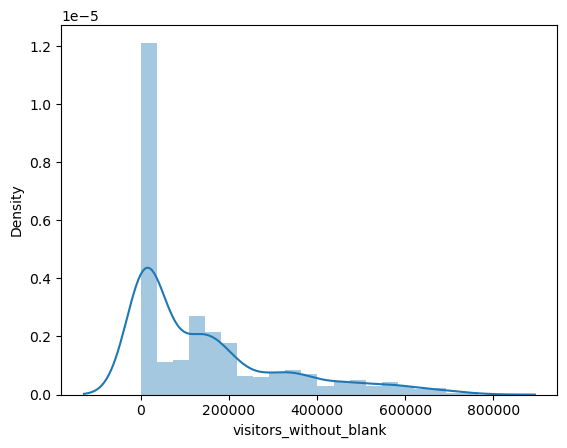

In [26]:
sns.distplot(df[df['visitors_without_blank']<=(df['visitors_without_blank'].describe()['75%']+1.5*IQR)]['visitors_without_blank'])

In [27]:
df[df['visitors_without_blank']<=(df['visitors_without_blank'].describe()['75%']+1.5*IQR)]['visitors_without_blank'].std()

172408.7225655993

In [28]:
1.194610e+06-172408.7225655993

1022201.2774344007

In [29]:
df['visitors_without_blank'].fillna(df['visitors_without_blank'].median(),axis=0).isna().sum()#,inplace=True)

0

In [30]:
df['visitors_without_blank'].fillna(df['visitors_without_blank'].median(),axis=0,inplace=True)

In [31]:
df[df['visitors_without_blank']<=(df['visitors_without_blank'].describe()['75%']+1.5*IQR)]['visitors_without_blank'].mean()

133428.03386167146

In [32]:
df[df['visitors_without_blank']<=(df['visitors_without_blank'].describe()['75%']+1.5*IQR)]['visitors_without_blank'].median()

119255.0

In [33]:
df['visitors']=df['visitors_without_blank']

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1512 entries, 0 to 395
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   district                1512 non-null   object 
 1   date                    1512 non-null   object 
 2   month                   1512 non-null   object 
 3   year                    1512 non-null   int64  
 4   visitors                1512 non-null   float64
 5   visitors_without_blank  1512 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 82.7+ KB


C:\Users\lenovo\AppData\Local\Temp\ipykernel_6324\2019514636.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['visitors'])
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='visitors', ylabel='Density'>

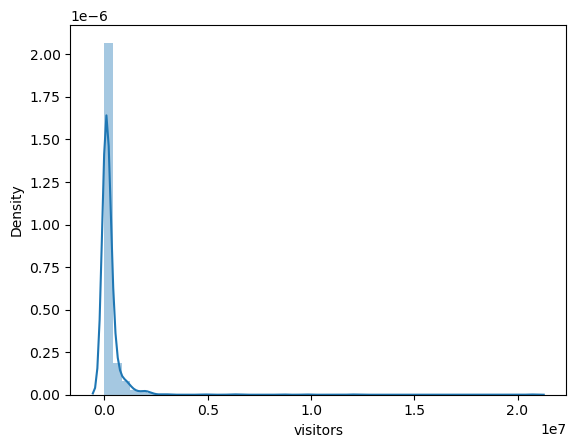

In [35]:
sns.distplot(df['visitors'])

In [36]:
df.isna().sum()

district                  0
date                      0
month                     0
year                      0
visitors                  0
visitors_without_blank    0
dtype: int64

In [37]:
df=df.drop('visitors_without_blank',axis=1)

In [38]:
df.head()

,district,date,month,year,visitors
0,Adilabad,01-01-2016,January,2016,792136.0
1,Adilabad,01-02-2016,February,2016,937820.0
2,Adilabad,01-03-2016,March,2016,582946.0
3,Adilabad,01-04-2016,April,2016,341948.0
4,Adilabad,01-05-2016,May,2016,252887.0


In [39]:
df['visitors'].mean()-df['visitors'].median()

143631.65608465608

C:\Users\lenovo\AppData\Local\Temp\ipykernel_6324\384256857.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['visitors']<=(df['visitors'].describe()['75%']+1.5*IQR)]['visitors'])
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='visitors', ylabel='Density'>

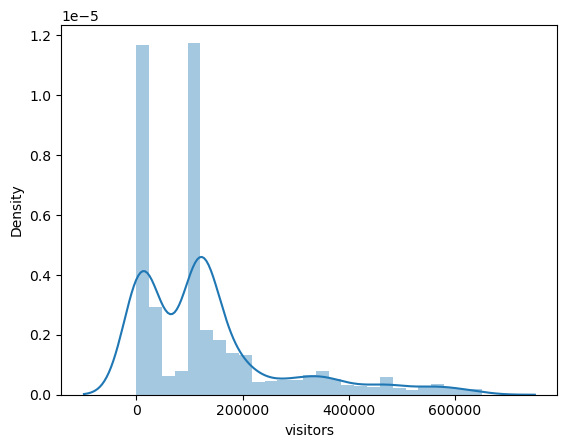

In [40]:
sns.distplot(df[df['visitors']<=(df['visitors'].describe()['75%']+1.5*IQR)]['visitors'])

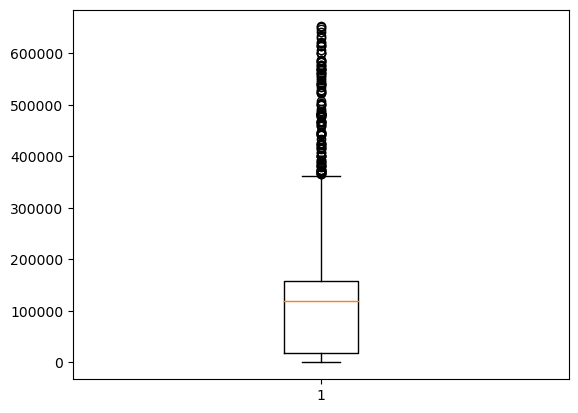

In [41]:
plt.boxplot(df[df['visitors']<=(df['visitors'].describe()['75%']+1.5*IQR)]['visitors'])
plt.show()

In [42]:
len(df[df['visitors']<=(df['visitors'].describe()['75%']+1.5*IQR)]['visitors'])


1388

In [43]:
#df.sort('one', ascending=False)
df.sort_values('visitors',ascending=False).head()

#plt.figure(figsize=(20,6))
#sns.barplot(x=df['district'],y=df['visitors'])

,district,date,month,year,visitors
349,Warangal (Urban),01-02-2016,February,2016,20703778.0
29,Hyderabad,01-06-2016,June,2016,12032661.0
17,Bhadradri Kothagudem,01-06-2019,June,2019,9761776.0
61,Jayashankar Bhoopalpally,01-02-2018,February,2018,8626250.0
60,Jayashankar Bhoopalpally,01-01-2018,January,2018,6519850.0


Question1

In [44]:
df_district_domestic_visitors=df.groupby(by='district')['visitors'].sum().sort_values().tail(10)

<Axes: xlabel='district'>

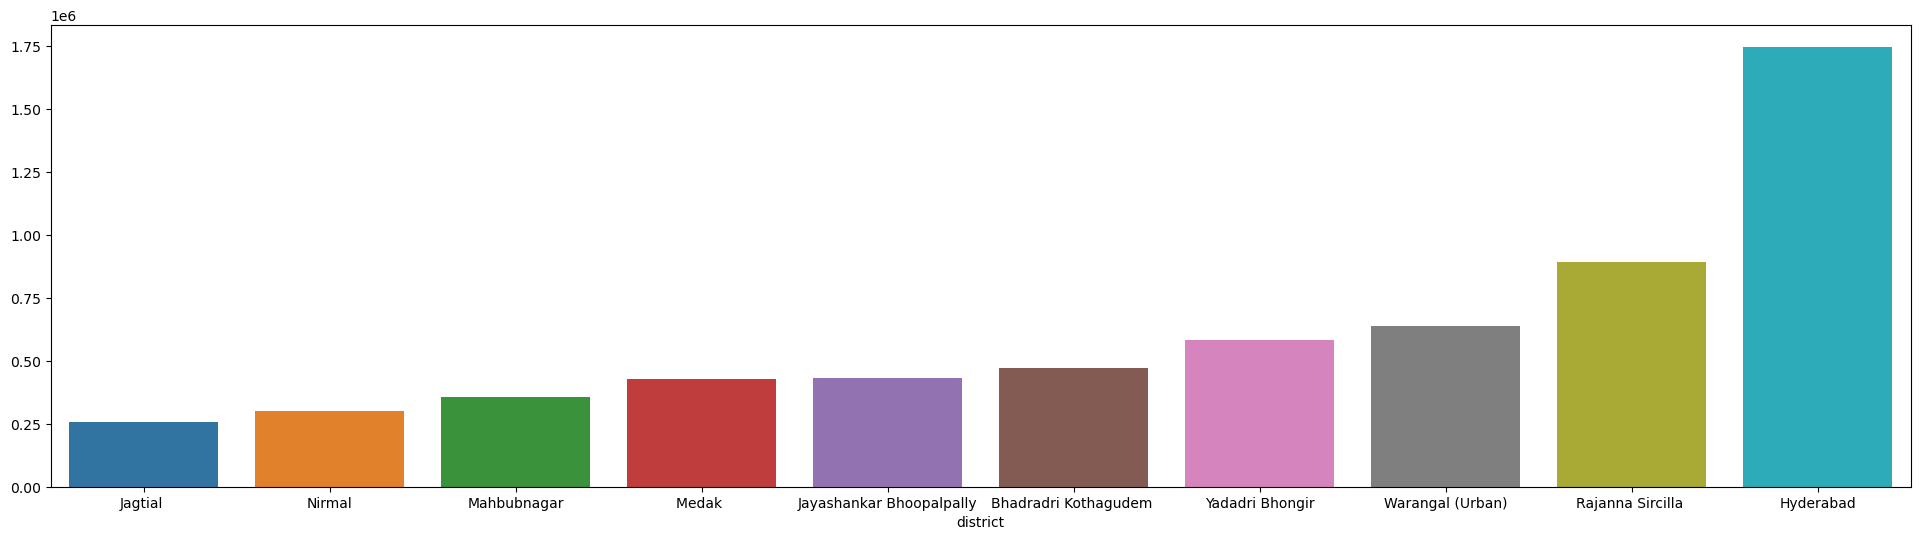

In [45]:
plt.figure(figsize=(24,6))
sns.barplot(x=df.groupby(by='district')['visitors'].mean().sort_values().tail(10).index,
            y=df.groupby(by='district')['visitors'].mean().sort_values().tail(10).values)

In [46]:
left1=df.groupby(by='district').year.min().to_frame(name = 'Min').reset_index()
left1['year']=left1['Min']
right1=df.groupby(by='district').year.max().to_frame(name = 'Max').reset_index()
right1['year']=right1['Max']
visitor_begin_year=pd.merge(left1,df,how='inner',on=['district','year'])
visitor_end_year=pd.merge(right1,df,how='inner',on=['district','year'])
#df.groupby(by=['district','year']).visitors.sum()
visitor_begin_year.drop(['Min','date','month','visitors'],axis=1,inplace=True)
visitor_end_year.drop(['Max','date','month','visitors'],axis=1,inplace=True)

In [47]:
visitors_min_max_year=df.groupby(by=['district','year']).visitors.sum().to_frame(name = 'Sum').reset_index()
visitor_begin_value=pd.merge(visitors_min_max_year,visitor_begin_year,how='inner',on=['district','year']).drop_duplicates()
visitor_end_value=pd.merge(visitors_min_max_year,visitor_end_year,how='inner',on=['district','year']).drop_duplicates()
visitor_end_value['cagr']=( ( (visitor_end_value['Sum']/visitor_begin_value['Sum']) ** (1/3))-1) *100

In [48]:
#left2=df.groupby(by='district').year.min().to_frame(name = 'Min').reset_index()
#left1['year']=left1['Min']
#right1=df.groupby(by='district').year.max().to_frame(name = 'Max').reset_index()
#right1['year']=right1['Max']


visitor_begin_value=pd.merge(visitors_min_max_year,visitor_begin_year,how='inner',on=['district','year']).drop_duplicates()
visitor_begin_value


,district,year,Sum
0,Adilabad,2016,5075557.0
12,Bhadradri Kothagudem,2016,1962325.0
24,Hyderabad,2016,23394705.0
36,Jagtial,2016,1696372.0
48,Jangaon,2016,1113955.0
60,Jayashankar Bhoopalpally,2016,1316695.0
72,Jogulamba Gadwal,2016,1596696.0
84,Kamareddy,2016,1073422.0
96,Karimnagar,2016,9167468.0
108,Khammam,2016,5005031.0


In [49]:
visitor_end_value=pd.merge(visitors_min_max_year,visitor_end_year,how='inner',on=['district','year']).drop_duplicates()
visitor_end_value


,district,year,Sum
0,Adilabad,2019,775895.0
12,Bhadradri Kothagudem,2019,12817737.0
24,Hyderabad,2019,13802362.0
36,Jagtial,2019,3086115.0
48,Jangaon,2019,328890.0
60,Jayashankar Bhoopalpally,2019,662530.0
72,Jogulamba Gadwal,2019,2007995.0
84,Kamareddy,2019,534.0
96,Karimnagar,2019,77491.0
108,Khammam,2019,1413440.0


In [50]:
visitor_end_value['cagr']=( ( (visitor_end_value['Sum']/visitor_begin_value['Sum']) ** (1/3))-1) *100

In [51]:
visitor_end_value

,district,year,Sum,cagr
0,Adilabad,2019,775895.0,-46.530464
12,Bhadradri Kothagudem,2019,12817737.0,86.930488
24,Hyderabad,2019,13802362.0,-16.128976
36,Jagtial,2019,3086115.0,22.076013
48,Jangaon,2019,328890.0,-33.412250
60,Jayashankar Bhoopalpally,2019,662530.0,-20.462222
72,Jogulamba Gadwal,2019,2007995.0,7.939432
84,Kamareddy,2019,534.0,-92.076381
96,Karimnagar,2019,77491.0,-79.629550
108,Khammam,2019,1413440.0,-34.391989


In [52]:
visitor_end_value

,district,year,Sum,cagr
0,Adilabad,2019,775895.0,-46.530464
12,Bhadradri Kothagudem,2019,12817737.0,86.930488
24,Hyderabad,2019,13802362.0,-16.128976
36,Jagtial,2019,3086115.0,22.076013
48,Jangaon,2019,328890.0,-33.412250
60,Jayashankar Bhoopalpally,2019,662530.0,-20.462222
72,Jogulamba Gadwal,2019,2007995.0,7.939432
84,Kamareddy,2019,534.0,-92.076381
96,Karimnagar,2019,77491.0,-79.629550
108,Khammam,2019,1413440.0,-34.391989


In [53]:
len(df[df['district']=='Hyderabad'])

48

top3 districts Based on cagr

In [54]:
visitor_end_value.sort_values(by='cagr',ascending=False).head(3)

,district,year,Sum,cagr
252,Nizamabad,2019,46333.0,93.029299
12,Bhadradri Kothagudem,2019,12817737.0,86.930488
276,Rajanna Sircilla,2019,16832897.0,73.016515


<Axes: xlabel='district', ylabel='cagr'>

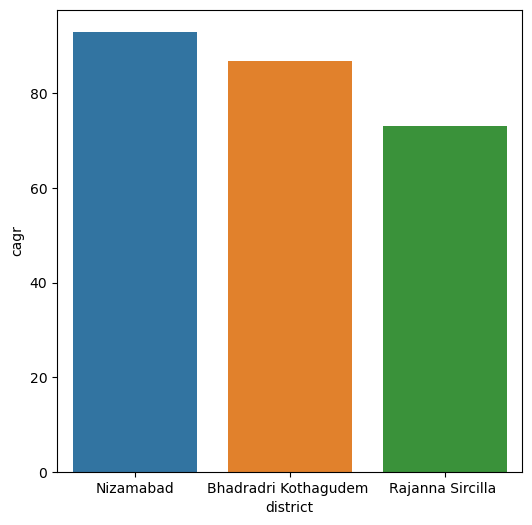

In [55]:
plt.figure(figsize=(6,6))
sns.barplot(x=visitor_end_value.sort_values(by='cagr',ascending=False).head(3)['district'],
            y=visitor_end_value.sort_values(by='cagr',ascending=False).head(3)['cagr'])

bottom3 districts Based on cagr

In [56]:
visitor_end_value.sort_values(by='cagr',ascending=False).tail(3)

,district,year,Sum,cagr
264,Peddapalli,2019,16581.0,-75.119430
96,Karimnagar,2019,77491.0,-79.629550
84,Kamareddy,2019,534.0,-92.076381


In [57]:
df.head()

,district,date,month,year,visitors
0,Adilabad,01-01-2016,January,2016,792136.0
1,Adilabad,01-02-2016,February,2016,937820.0
2,Adilabad,01-03-2016,March,2016,582946.0
3,Adilabad,01-04-2016,April,2016,341948.0
4,Adilabad,01-05-2016,May,2016,252887.0


In [58]:
df.groupby(by='month').visitors.sum()

month
April        28010023.0
August       26248204.0
December     31499793.0
February     62130393.0
January      45437277.0
July         23108377.0
June         47192229.0
March        32794875.0
May          26935599.0
November     25218011.0
October      24163495.0
September    24746348.0
Name: visitors, dtype: float64

PEAK SEASON MONTHS FOR HYDERABAD

In [59]:
df[df['district']=='Hyderabad'].groupby(by='month').visitors.sum().sort_values(ascending=False).head(3)

month
June        16897783.0
December     9338637.0
October      6552397.0
Name: visitors, dtype: float64

LOW SEASON MONTHS FOR HYDERABAD

In [60]:
df[df['district']=='Hyderabad'].groupby(by='month').visitors.sum().sort_values(ascending=False).tail(3)

month
September    5312283.0
March        5227626.0
February     5014430.0
Name: visitors, dtype: float64

([<matplotlib.patches.Wedge at 0x261bb036560>,
 [Text(1.071179876688186, 0.2501473001618911, 'April'),
  Text(0.8593499729236618, 0.6866714090714, 'August'),
  Text(0.35812582575088037, 1.0400701384667528, 'December'),
  Text(-0.22481088783375777, 1.0767822735870969, 'February'),
  Text(-0.6526521312114891, 0.8854632661071273, 'January'),
  Text(-0.9725689084003889, 0.5139160616412726, 'July'),
  Text(-1.0315970187450074, -0.38184760169001086, 'June'),
  Text(-0.415985989159799, -1.0183101967587007, 'March'),
  Text(0.03786875938367922, -1.099347969053812, 'May'),
  Text(0.49974947967391514, -0.9799236998693578, 'November'),
  Text(0.8802147064289839, -0.6597136277098858, 'October'),
  Text(1.0783099401532001, -0.2173652984420517, 'September')])

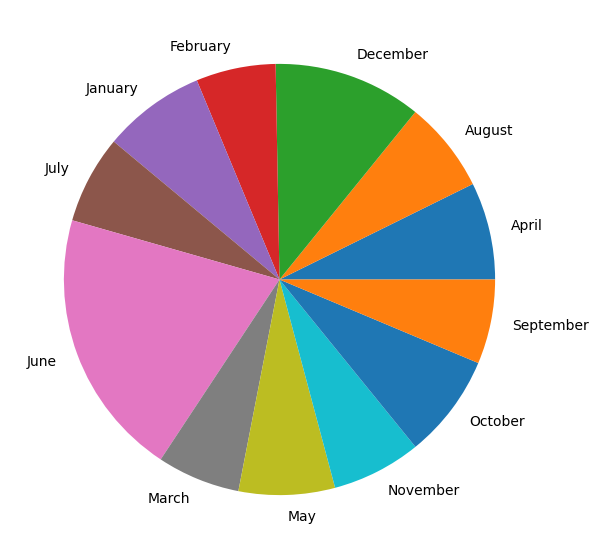

In [61]:
fig = plt.figure(figsize =(10, 7))
plt.pie(df[df['district']=='Hyderabad'].groupby(by='month').visitors.sum().values, labels = df[df['district']=='Hyderabad'].groupby(by='month').visitors.sum().index)

In [62]:
df5=pd.read_csv('foreign_visitors_2016.csv')

In [63]:
df5.head()

,district,date,month,year,visitors
0,Adilabad,01-01-2016,January,2016,2
1,Adilabad,01-02-2016,February,2016,0
2,Adilabad,01-03-2016,March,2016,2
3,Adilabad,01-04-2016,April,2016,0
4,Adilabad,01-05-2016,May,2016,0


In [64]:
df6=pd.read_csv('foreign_visitors_2017.csv')

In [65]:
df7=pd.read_csv('foreign_visitors_2018.csv')

In [66]:
df8=pd.read_csv('foreign_visitors_2019.csv')

In [67]:
df_foreign=pd.concat([df5,df6,df7,df8],axis=0)

In [68]:
df_foreign.to_csv('foreign_tourists.csv')
df_foreign.head()

,district,date,month,year,visitors
0,Adilabad,01-01-2016,January,2016,2
1,Adilabad,01-02-2016,February,2016,0
2,Adilabad,01-03-2016,March,2016,2
3,Adilabad,01-04-2016,April,2016,0
4,Adilabad,01-05-2016,May,2016,0


In [69]:
df_foreign.isna().sum()

district    0
date        0
month       0
year        0
visitors    0
dtype: int64

In [70]:
df_foreign['visitors'].info()
#visitor_foreign_end_value

<class 'pandas.core.series.Series'>
Index: 1512 entries, 0 to 395
Series name: visitors
Non-Null Count  Dtype 
--------------  ----- 
1512 non-null   object
dtypes: object(1)
memory usage: 23.6+ KB


In [71]:
import math
from numpy import nan

def isblank_na(x):
    
    if x!=' ':
        if  isinstance(x,str):
            return float(x)

df_foreign['visitors'].dropna(axis=0,inplace=True)        
df_foreign['visitors_without_blank']=df_foreign['visitors'].apply(lambda x:isblank_na(x))

C:\Users\lenovo\AppData\Local\Temp\ipykernel_6324\2276421444.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_foreign['visitors_without_blank'].dropna(axis=0))
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='visitors_without_blank', ylabel='Density'>

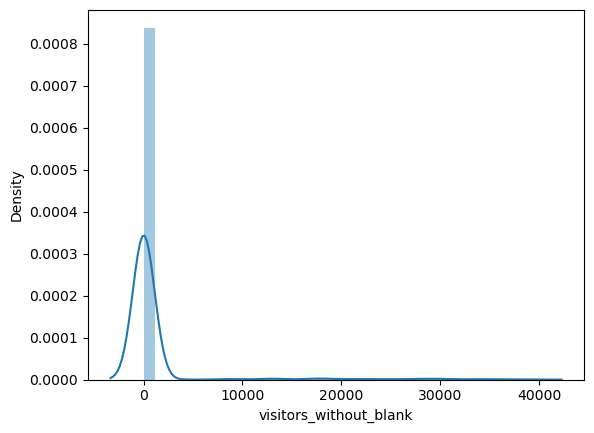

In [72]:
sns.distplot(df_foreign['visitors_without_blank'].dropna(axis=0))

In [73]:
IQR=df_foreign['visitors_without_blank'].describe()['75%']-df_foreign['visitors_without_blank'].describe()['25%']
IQR

0.0

In [74]:
df_foreign[df_foreign['visitors_without_blank']>(df_foreign['visitors_without_blank'].describe()['75%']+1.5*IQR)]['visitors_without_blank']

0          2.0
2          2.0
6          4.0
7          2.0
24     15865.0
        ...   
379      230.0
380      240.0
381      220.0
382      230.0
383      210.0
Name: visitors_without_blank, Length: 293, dtype: float64

In [75]:
df_foreign['visitors_without_blank'].describe()['75%']

0.0

In [76]:
df_foreign['visitors_without_blank'].fillna(df_foreign['visitors_without_blank'].median(),axis=0,inplace=True)
#df_foreign['visitors_without_blank'].describe()

In [77]:
df_foreign['visitors']=df_foreign['visitors_without_blank']

In [78]:
df_foreign.drop('visitors_without_blank',axis=1,inplace=True)

In [79]:
df_foreign.isna().sum()

district    0
date        0
month       0
year        0
visitors    0
dtype: int64

In [80]:
df_district_domestic_visitors=df.groupby(by='district')['visitors'].sum().sort_values()

df_district_foreign_visitors=df_foreign.groupby(by='district')['visitors'].sum().sort_values()

In [81]:
df_district_domestic_visitors

district
Nizamabad                     116147.0
Kamareddy                    1075068.0
Narayanapet                  1104780.0
Peddapalli                   1130272.0
Komaram Bheem Asifabad       1166029.0
Mahabubabad                  1673992.0
Mulugu                       1819800.0
Warangal (Rural)             1892457.0
Jangaon                      1899575.0
Mancherial                   1940537.0
Wanaparthy                   1963373.0
Suryapet                     3935415.0
Ranga Reddy                  5724240.0
Vikarabad                    5724240.0
Medchal                      5724240.0
Nalgonda                     6401933.0
Siddipet                     6848580.0
Adilabad                     7321575.0
Jogulamba Gadwal             7886635.0
Nagarkurnool                 8497650.0
Khammam                      9378315.0
Karimnagar                   9462383.0
Sangareddy                  11497805.0
Jagtial                     12376809.0
Nirmal                      14389091.0
Mahbubnagar     

In [82]:
df_district_foreign_visitors.head(5)


district
Yadadri Bhongir    0.0
Nalgonda           0.0
Ranga Reddy        0.0
Sangareddy         0.0
Medchal            0.0
Name: visitors, dtype: float64

In [83]:
df_district_foreign_visitors.values/df_district_domestic_visitors.values

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.35359188e-07,
       2.13257925e-07, 5.28408119e-07, 4.34865611e-07, 8.07962699e-07,
       2.22390699e-06, 1.78112863e-05, 2.79905615e-05, 3.67523481e-05,
       4.16772201e-05, 4.47680473e-05, 7.42678909e-05, 2.05922178e-04,
       1.24539457e-02])

In [84]:
left3=df_district_domestic_visitors.to_frame().reset_index()
left3

,district,visitors
0,Nizamabad,116147.0
1,Kamareddy,1075068.0
2,Narayanapet,1104780.0
3,Peddapalli,1130272.0
4,Komaram Bheem Asifabad,1166029.0
5,Mahabubabad,1673992.0
6,Mulugu,1819800.0
7,Warangal (Rural),1892457.0
8,Jangaon,1899575.0
9,Mancherial,1940537.0


In [85]:
left3=df_district_domestic_visitors.to_frame().reset_index()
right3=df_district_foreign_visitors.to_frame().reset_index()
df_district_foreign_visitors=pd.merge(left3,right3,on='district',how='inner')

In [86]:
df_district_foreign_visitors.head()

,district,visitors_x,visitors_y
0,Nizamabad,116147.0,5.0
1,Kamareddy,1075068.0,0.0
2,Peddapalli,1130272.0,0.0
3,Komaram Bheem Asifabad,1166029.0,0.0
4,Mahabubabad,1673992.0,0.0


In [87]:
#rankings_pd.rename(columns = {'test':'TEST'}, inplace = True) 
df_district_foreign_visitors.rename(columns={'visitors_x':'domestic_vis','visitors_y':'foreign_vis'},inplace=True)

In [88]:
df_district_foreign_visitors['ratio']=df_district_foreign_visitors['foreign_vis']/df_district_foreign_visitors['domestic_vis']

BOTTOM 3 DISTRICTS BASED ON DOMESTIC/FOREIGN VISITROS RATIO

In [91]:
df_district_foreign_visitors.sort_values(by='ratio',ascending=False).head(3)

,district,domestic_vis,foreign_vis,ratio
31,Hyderabad,83900960.0,1044898.0,0.012454
5,Mulugu,1819800.0,575.0,0.000316
29,Warangal (Urban),30726603.0,8821.0,0.000287


TOP 3 DISTRICTS BASED ON DOMESTIC/FOREIGN VISITROS RATIO

In [92]:
df_district_foreign_visitors.sort_values(by='ratio',ascending=False).tail(3)

,district,domestic_vis,foreign_vis,ratio
12,Vikarabad,5724240.0,0.0,0.0
11,Ranga Reddy,5724240.0,0.0,0.0
20,Karimnagar,9462383.0,0.0,0.0


In [93]:
df_population=pd.read_csv('population_data_csv.CSV')

In [94]:
df_population.head()

,Unnamed: 0,District,PopulationCensus2011-03-01
0,0,Mahbubnagar,"20,721"
1,1,Adilabad,"117,167"
2,2,Medak,"11,276"
3,3,Medak,"36,452"
4,4,Medak,"6,840"


In [95]:
df_population=df_population[['District','PopulationCensus2011-03-01']]

In [96]:
df_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   District                    157 non-null    object
 1   PopulationCensus2011-03-01  158 non-null    object
dtypes: object(2)
memory usage: 2.6+ KB


In [97]:
df_population.dropna(inplace=True)

In [102]:
#rankings_pd.rename(columns = {'test':'TEST'}, inplace = True) 
df_population.rename(columns={'PopulationCensus2011-03-01':'Population','District':'district'},inplace=True) 

In [99]:
df_population['Population']=df_population['Population'].apply(lambda x:float(x.replace(",", "")))

In [103]:
df_population.head()
df_population.info()
#df_population.to_csv('population_data.csv')

df_population['district'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Index: 157 entries, 0 to 157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   district    157 non-null    object 
 1   Population  157 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.7+ KB


district
Medak          24
Rangareddy     24
Adilabad       22
Mahbubnagar    18
Nalgonda       17
Warangal       15
Khammam        14
Karimnagar     13
Nizamabad       8
Hyderabad       2
Name: count, dtype: int64

In [104]:
df[df['year']==2019]

,district,date,month,year,visitors
0,Adilabad,01-01-2019,January,2019,25071.0
1,Adilabad,01-02-2019,February,2019,406177.0
2,Adilabad,01-03-2019,March,2019,14347.0
3,Adilabad,01-04-2019,April,2019,9972.0
4,Adilabad,01-05-2019,May,2019,6997.0
...,...,...,...,...,...
391,Yadadri Bhongir,01-08-2019,August,2019,389010.0
392,Yadadri Bhongir,01-09-2019,September,2019,366862.0
393,Yadadri Bhongir,01-10-2019,October,2019,381860.0
394,Yadadri Bhongir,01-11-2019,November,2019,365990.0


In [105]:
df_district_domestic_visitors.to_frame().reset_index().head()

,district,visitors
0,Nizamabad,116147.0
1,Kamareddy,1075068.0
2,Narayanapet,1104780.0
3,Peddapalli,1130272.0
4,Komaram Bheem Asifabad,1166029.0


In [106]:
visitor_dom_2019=visitor_end_value.drop(['cagr'],axis=1)

In [107]:
visitor_dom_2019.head()

,district,year,Sum
0,Adilabad,2019,775895.0
12,Bhadradri Kothagudem,2019,12817737.0
24,Hyderabad,2019,13802362.0
36,Jagtial,2019,3086115.0
48,Jangaon,2019,328890.0


In [108]:
df_for_2019=df_foreign.groupby(by=['district','year'])['visitors'].sum().to_frame().reset_index()

In [109]:
visitor_for_2019=df_for_2019[df_for_2019['year']==2019]

In [110]:
df_domestic_foreign_visitors_sum=pd.merge(visitor_dom_2019,visitor_for_2019,on=['district','year'],how='inner')
df_domestic_foreign_visitors_sum['district']=df_domestic_foreign_visitors_sum['district'].replace({'Warangal (Rural)': 'Warangal', 'Warangal (Urban)': 'Warangal'})
df_domestic_foreign_visitors_sum=df_domestic_foreign_visitors_sum.groupby(by=['district','year'])['Sum'].sum().to_frame('Sum').reset_index()

In [127]:
df_domestic_foreign_visitors_sum.head()

,district,year,Sum
0,Adilabad,2019,775895.0
1,Bhadradri Kothagudem,2019,12817737.0
2,Hyderabad,2019,13802362.0
3,Jagtial,2019,3086115.0
4,Jangaon,2019,328890.0


In [120]:
df_population.rename(columns={'District':'district'},inplace=True)
df_visitors_population=pd.merge(df_domestic_foreign_visitors_sum,df_population,on='district',how='inner')
df_visitors_population.rename(columns={'Sum':'visitors'},inplace=True)
df_visitors_population.head()


,district,year,visitors,Population
0,Adilabad,2019,775895.0,117167.0
1,Adilabad,2019,775895.0,23059.0
2,Adilabad,2019,775895.0,55841.0
3,Adilabad,2019,775895.0,49764.0
4,Adilabad,2019,775895.0,23579.0


In [134]:
ku=df_foreign.groupby(by=['district','year'])['visitors'].sum().to_frame('sum').reset_index()
ku[ku['district']=='Hyderabad']

,district,year,sum
8,Hyderabad,2016,163631.0
9,Hyderabad,2017,247179.0
10,Hyderabad,2018,314788.0
11,Hyderabad,2019,319300.0


In [121]:
df_visitors_population=df_visitors_population.groupby(by=['district','year','visitors'])['Population'].sum().to_frame(name = 'Population').reset_index()

In [122]:
df_visitors_population['ratio']=df_visitors_population['visitors']/df_visitors_population['Population']

TOP 2 DISTRICTS BASED ON VISITORS/POPULATION RATION

In [123]:
df_visitors_population.sort_values(by='ratio',ascending=False)

,district,year,visitors,Population,ratio
1,Hyderabad,2019,13802362.0,224672.0,61.433387
3,Mahbubnagar,2019,2534815.0,607692.0,4.171217
6,Warangal,2019,2148730.0,992333.0,2.165332
2,Khammam,2019,1413440.0,655911.0,2.154927
0,Adilabad,2019,775895.0,760259.0,1.020567
4,Nalgonda,2019,140918.0,662507.0,0.212704
5,Nizamabad,2019,46333.0,588372.0,0.078748


BOTTOM 2 DISTRICTS BASED ON VISITORS/POPULATION RATION

In [124]:
df_visitors_population.sort_values(by='ratio',ascending=False).tail(2)

,district,year,visitors,Population,ratio
4,Nalgonda,2019,140918.0,662507.0,0.212704
5,Nizamabad,2019,46333.0,588372.0,0.078748


In [125]:
df.head()

,district,date,month,year,visitors
0,Adilabad,01-01-2016,January,2016,792136.0
1,Adilabad,01-02-2016,February,2016,937820.0
2,Adilabad,01-03-2016,March,2016,582946.0
3,Adilabad,01-04-2016,April,2016,341948.0
4,Adilabad,01-05-2016,May,2016,252887.0


In [127]:
left11=df_foreign.groupby(by='district').year.min().to_frame(name = 'Min').reset_index()
left11['year']=left11['Min']
right11=df_foreign.groupby(by='district').year.max().to_frame(name = 'Max').reset_index()
right11['year']=right11['Max']
visitor_foreign_begin_year=pd.merge(left11,df_foreign,how='inner',on=['district','year'])
visitor_foreign_end_year=pd.merge(right11,df_foreign,how='inner',on=['district','year'])
#df.groupby(by=['district','year']).visitors.sum()
visitor_foreign_begin_year.drop(['Min','date','month','visitors'],axis=1,inplace=True)
visitor_foreign_end_year.drop(['Max','date','month','visitors'],axis=1,inplace=True)
visitors_foreign_min_max_year=df_foreign.groupby(by=['district','year']).visitors.sum().to_frame(name = 'Sum').reset_index()
visitor_foreign_begin_value=pd.merge(visitors_foreign_min_max_year,visitor_foreign_begin_year,how='inner',on=['district','year']).drop_duplicates()
visitor_foreign_end_value=pd.merge(visitors_foreign_min_max_year,visitor_foreign_end_year,how='inner',on=['district','year']).drop_duplicates()
visitor_foreign_end_value['cagr']=( ( (visitor_foreign_end_value['Sum']/visitor_foreign_begin_value['Sum']) ** (1/3))-1) *100

Q7. COMPUTE PROJECT DOMESTIC VISITORS IN YEAR 2025 BASED ON GROWTH RATE FROM PREVIOUS YEARS


WE WILL BE UTILISING OUT CAGR VALUE TO ESTIMATES THE DOMESTIC VISITORS IN YEAR 2025
CAGR IS COMPOUND ANNUAL GROWTH RATE WHOSE VALUE IS GIVEN BY 

CAGR=(((END_VALUE/BEGIN_VALUE)^1/n)-1)

FOR DOMESTIC VISITORS

here END_VALUE AND BEGIN_VALUE indicate the sum_of_visitors  in year 2019 and 2016 repectively and n=3 (difference between starting and ending year).
we get cagr = -16.13 

we use this value to compute visitors in 2025 by subjecting end_value

end_value=(CAGR+1)^n*BEGIN_VALUE

here cagr=-16.13,n=2025-2019=6 and BEGIN_VALUE IS sum_of_visitors  in year 2019

FOR FOREIGN VISITORS
cagr = 24.961946


In [128]:
visitor_end_value[visitor_end_value['district']=='Hyderabad']

,district,year,Sum,cagr
24,Hyderabad,2019,13802362.0,-16.128976


In [114]:
projected_visitors_2025=((1-16.13)**6)*13802362
print(f"Estimated domestic visitors in 2025: {round(projected_visitors_2025/1000000000)} billion")

Estimated domestic visitors in 2025: 165572 billion


In [130]:
visitor_foreign_end_value[visitor_end_value['district']=='Hyderabad']

,district,year,Sum,cagr
24,Hyderabad,2019,319300.0,24.961946


In [113]:
projected_foreign_visitors_2025=((1+24.961946)**6)*319300.0
print(f"Estimated foreign visitors in 2025: {round(projected_foreign_visitors_2025/1000000000)} billion")

Estimated foreign visitors in 2025: 97774 billion


Q8:

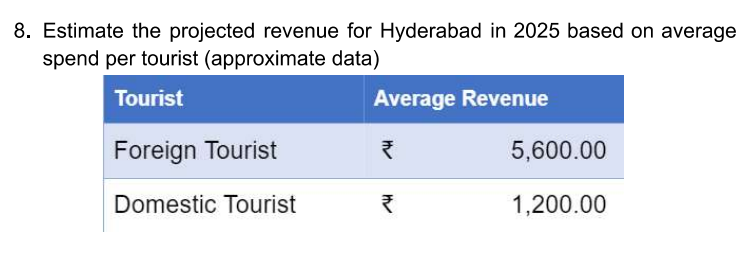


WE CAN COMPUTE REVENUE IN 2025 BY MULTIPLYING ESIMED VISITORS IN 2025 BY AVERAGE REVENUE(1200)

In [116]:
dom_rev_2025=projected_visitors_2025*1200
print(f"Estimated revenue from domestic visitors in 2025: Rs {round(dom_rev_2025/1000000000)} billion")

Estimated revenue from domestic visitors in 2025: Rs 198686440 billion


In [117]:
for_rev_2025=projected_foreign_visitors_2025*5600
print(f"Estimated revenue from foreign visitors in 2025: Rs {round(for_rev_2025/1000000000)} billion")

Estimated revenue from foreign visitors in 2025: Rs 547533126 billion
